## Basic tips about jupyter notebook

SOURCE: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

- **Esc** will take you into command mode where you can navigate around your notebook with arrow keys.

- In command mode:
    - **A** to insert a new cell above the current cell, **B** to insert a new cell below.
    - **M** to change the current cell to Markdown, **Y** to change it back to code
    - **D + D** (press the key twice) to delete the current cell
    
- **Enter** will take you from command mode back into edit mode for the given cell.
- You can also use **Shift + M** to merge multiple cells.






## Extract album title from a single item on a single page
SOURCE: https://github.com/qut-dmrc/web-scraping-intro-workshop/blob/master/web-scraping-intro-step1.ipynb

This notebook gets a page from the Metacritic website and then extracts one of the fields we are interested in from it.


In [3]:
# Import python modules
import bs4       # BeautifulSoup4 is a Python package for parsing HTML and XML documents
import requests  # It allows you to send HTTP requests in Python

The next steps build up the URL that has the information we want. The sections of the url that we will want to change to get more pages of information are kept seperate so we can change them more easily.

In [4]:
# This is the base_url
base_url = "http://www.metacritic.com/browse/albums/artist"

In [5]:
# Select which page to scrape based on the first letter of the artist names
letter = "/a"

In [8]:
# Build the url (only scrape the first page - page 0)
page = base_url+letter+"?page=0"

Now lets check what the variable thepage is set to. You can show the value of any variable in a notebook by putting it in the last line of a notebook cell and running the cell. Jupyter will try to display it in a clear way, often clearer than the default 'print' layout.

In [9]:
page

'http://www.metacritic.com/browse/albums/artist/a?page=0'

These steps get the page using Requests and then process it using BeautifulSoup.



In [10]:
# the bot pretends to be a Chrome browser
hdrs = {"User-Agent": "Chrome/78.0"}

In [11]:
# call the url
response_url = requests.get(page, headers=hdrs)   # We can see the status code that the server returned. 
                                                  # If the server returns 200 status code, the program will work!
                                                  # If the server returns 404, the program will fail.
if response_url.status_code == 200:
    print("Success!")
    
elif response_url.status_code == 404:
    print("Not found!")                           # It works!!

Success!


In [12]:
response_url

<Response [200]>

In [13]:
# Transform to soup using html.parser 
soup = bs4.BeautifulSoup(response_url.text, "html.parser")

In [14]:
# Find all div-tags of class "product_wrap" (We found it using the SelectorGadget extension)
title_tag = soup.find_all("div", class_=["product_wrap"]) 

# Have a look at the first item in the list
title_tag[0]

<div class="product_wrap">
<div class="basic_stat product_title">
<a href="/music/colonia/a-camp">
                            Colonia
                                                    </a>
</div>
<div class="basic_stat product_score brief_metascore">
<div class="metascore_w small release positive">64</div>
</div>
<div class="basic_stat condensed_stats">
<ul class="more_stats">
<li class="stat product_artist">
<span class="label">Artist:</span>
<span class="data">A Camp</span>
</li>
<li class="stat product_avguserscore">
<span class="label">User:</span>
<span class="data textscore textscore_favorable">8.0</span>
</li>
<li class="stat release_date full_release_date">
<span class="label">Release Date:</span>
<span class="data">Apr 28, 2009</span>
</li>
</ul>
</div>
</div>

In [15]:
# Extract the first div-tag from the first item
thetitle = title_tag[0].find("div", class_="product_title")
thetitle

<div class="basic_stat product_title">
<a href="/music/colonia/a-camp">
                            Colonia
                                                    </a>
</div>

In [16]:
# The album name is the text part of this tag
temp= thetitle.get_text()
temp

'\n\n                            Colonia\n                                                    \n'

In [18]:
# It's poorly formatted so we need to clean it up a bit by first splitting the string into a list of words
temptemp= temp.split()
temptemp

['Colonia']

In [19]:
# And then we need to join the words back together with single spaces between them
clean_title = " ".join(temptemp)
clean_title

'Colonia'

## Extract all album titles on a single page
SOURCE: https://github.com/qut-dmrc/web-scraping-intro-workshop/blob/master/web-scraping-intro-step2.ipynb

This notebook extends the previous step to get all of the titles from a single page.

- We already have bs4 and requests python modules, so we don't need to import more modules. 
- We also have the base_url, the lett, the page and the browser
- We have checked that the status code is 200

In [21]:
page

'http://www.metacritic.com/browse/albums/artist/a?page=0'

In [22]:
# Transform to soup using html.parser parser
soup = bs4.BeautifulSoup(response_url.text, "html.parser")

# Find all div-tags of class "product_wrap" (We found it using the SelectorGadget extension)
title_tag = soup.find_all("div", class_=["product_wrap"]) 

Now process **title_tag** in a new way to get all the items instead of just one.

In [23]:
# Let's do the same thing as in the previous step but for all items in the page

list = []

for item in title_tag:
    
    # extract the first div-tag from the item
    thetitle = item.find("div", class_="product_title")
    
    # extract and clean up the album name
    temptemp = thetitle.get_text()
    temptemp= temptemp.split()
    album_name = " ".join(temptemp)
    
    # add the albun name to the list
    list += [album_name]

In [24]:
#list

['Colonia',
 'Call It Blazing',
 'Common Courtesy',
 'Bad Vibrations',
 'Pines',
 'Pile',
 'Toy',
 'Feathers Wet, Under the Moon',
 'Wooden Mask',
 'Passover',
 "You're Always on My Mind",
 'A Gun Called Tension',
 'Essence',
 'Darkness At Noon',
 'The Way The Wind Blows',
 'Cervantine',
 'You Have Already Gone to the Other World',
 'And Hell Will Follow Me',
 'Thirteenth Step',
 'eMOTIVe',
 'Eat the Elephant',
 'A Place To Bury Strangers',
 'Exploding Head',
 'Onwards to the Wall [EP]',
 'Worship',
 'Transfixiation',
 'Pinned',
 'Elasticity',
 'Ashes Grammar',
 'Nitetime Rainbows [EP]',
 'Autumn, Again',
 'Sea When Absent',
 'We Got It From Here...Thank You 4 Your Service',
 'Partycrasher',
 'A Winged Victory for the Sullen',
 'Atomos',
 'Iris [Original Motion Picture Soundtrack]',
 'The Undivided Five',
 'Trap Lord',
 'Always Strive and Prosper',
 'Still Striving [Mixtape]',
 'Cozy Tapes, Vol. 1: Friends',
 'Cozy Tapes, Vol. 2: Too Cozy',
 'Live Love A$AP',
 'Long.Live.A$AP',
 'At.Lo

## Extract all review data from a single page
SOURCE: https://github.com/qut-dmrc/web-scraping-intro-workshop/blob/eed5d2a9dcc328dc2988b31ac0b8adadc2f0561c/web-scraping-intro-step3.ipynb

Extend from getting just the title field to getting all the fields we are interested in from each item.

- We already have bs4 and requests python modules, so we don't need to import more modules. 
- We also have the base_url, the lett, the page and the browser
- We have checked that the status code is 200

In [25]:
page

'http://www.metacritic.com/browse/albums/artist/a?page=0'

In [26]:
# Transform to soup using html.parser parser
soup = bs4.BeautifulSoup(response_url.text, "html.parser")

# Find all div-tags of class "product_wrap" (We found it using the SelectorGadget extension)
title_tag = soup.find_all("div", class_=["product_wrap"]) 

Now process **title_tag** in a new way to get more fields for all of the items.



In [108]:
list = []

for item in title_tag:
    
    # Empty item
    item_x = []
     
    # Album name
    temptemp = item.find("div",class_="product_title")
    temptemp = temptemp.get_text()
    temptemp = temptemp.split()
    item_x += [" ".join(temptemp)]

    # Artist name
    temptemp = item.find("li",class_="product_artist")
    temptemp = temptemp.find("span", class_=["data"]).get_text()
    item_x += [temptemp]
    
    # Album name
    temptemp = item.find("li", class_="release_date")
    temptemp = temptemp.find("span", class_=["data"]).get_text()
    item_x +=  [temptemp]
    
    # Metacritic score
    temptemp = item.find("div", class_="product_score").get_text()
    temptemp = temptemp.split()
    item_x += [" ".join(temptemp)]

    # User score
    temptemp = item.find("li", class_="product_avguserscore")
    temptemp = temptemp.find("span",class_=["data"]).get_text()
    item_x += [temptemp]
    
    # url
    temptemp = item.find("div",class_="product_title")
    temptemp= "http://www.metacritic.com"+temptemp.a.attrs["href"]
    item_x += [temptemp]

    # Add to the list
    list += [item_x]   
    

In [113]:
#list

## Structure the data extraction as a function
SOURCE: https://github.com/qut-dmrc/web-scraping-intro-workshop/blob/eed5d2a9dcc328dc2988b31ac0b8adadc2f0561c/web-scraping-intro-step4.ipynb

This notebook shows how to move the code for data extraction into a function.

A function makes it easier to call a block of code with different data and to reuse it in other code. In this case we have chosen to have the function expect one of the review pages which has already been processed by BeautifulSoup as a parameter.



**Function definitions** 

The code in this cell is doing exactly the same thing as in the previous step but packaged into a function that call be called when necessary.

The function **PROCESSES a beautiful_soup data structure** and **RETURNS new album_reviews as a list of lists**.

In [114]:
def get_itemlist(soup):

    # Find all div-tags of class "product_wrap" (We found it using the SelectorGadget extension)
    title_tag = soup.find_all("div", class_=["product_wrap"]) 
    
    list = []

    for item in title_tag:
    
        # Empty item
        item_x = []

        # Album name
        temptemp = item.find("div",class_="product_title")
        temptemp = temptemp.get_text()
        temptemp = temptemp.split()
        item_x += [" ".join(temptemp)]

        # Artist name
        temptemp = item.find("li",class_="product_artist")
        temptemp = temptemp.find("span", class_=["data"]).get_text()
        item_x += [temptemp]

        # Album name
        temptemp = item.find("li", class_="release_date")
        temptemp = temptemp.find("span", class_=["data"]).get_text()
        item_x +=  [temptemp]

        # Metacritic score
        temptemp = item.find("div", class_="product_score").get_text()
        temptemp = temptemp.split()
        item_x += [" ".join(temptemp)]

        # User score
        temptemp = item.find("li", class_="product_avguserscore")
        temptemp = temptemp.find("span",class_=["data"]).get_text()
        item_x += [temptemp]

        # url
        temptemp = item.find("div",class_="product_title")
        temptemp= "http://www.metacritic.com"+temptemp.a.attrs["href"]
        item_x += [temptemp]
        
        # not all albums have both expert reviews and user reviews. Those albums
        # that has data missing, use "tbd" instead. We only want to add items
        # that have both user_score and mc_score

        # Add to the list
        if not "tbd" in item_x:
            list = list + [item_x]   
            
    return list

**Calling the function** 

In [115]:
reviews = get_itemlist(soup)

In [117]:
#reviews

## Store the data in a dataframe and save to disk
SOURCE: https://github.com/qut-dmrc/web-scraping-intro-workshop/blob/eed5d2a9dcc328dc2988b31ac0b8adadc2f0561c/web-scraping-intro-step5.ipynb

This notebook extends the get_itemlist function to save the data in a dataframe.

In [118]:
# Import python modules
import bs4       # BeautifulSoup4 is a Python package for parsing HTML and XML documents
import requests  # It allows you to send HTTP requests in Python
import pandas as pd 

**Define columns labels for the dataframe**

In [122]:
colnames = ["artistname", "albumname", "release_date", "mc_score", "user_score", "url"]

**Function definitions** 

In [123]:
# Let's change a little bit the function
def get_itemlist(soup):

    # Find all div-tags of class "product_wrap" (We found it using the SelectorGadget extension)
    title_tag = soup.find_all("div", class_=["product_wrap"]) 
    
    list = []

    for item in title_tag:
    
        # Empty item
        item_x = []

        # Album name
        temptemp = item.find("div",class_="product_title")
        temptemp = temptemp.get_text()
        temptemp = temptemp.split()
        item_x += [" ".join(temptemp)]

        # Artist name
        temptemp = item.find("li",class_="product_artist")
        temptemp = temptemp.find("span", class_=["data"]).get_text()
        item_x += [temptemp]

        # Album name
        temptemp = item.find("li", class_="release_date")
        temptemp = temptemp.find("span", class_=["data"]).get_text()
        item_x +=  [temptemp]

        # Metacritic score
        temptemp = item.find("div", class_="product_score").get_text()
        temptemp = temptemp.split()
        item_x += [" ".join(temptemp)]

        # User score
        temptemp = item.find("li", class_="product_avguserscore")
        temptemp = temptemp.find("span",class_=["data"]).get_text()
        item_x += [temptemp]

        # url
        temptemp = item.find("div",class_="product_title")
        temptemp= "http://www.metacritic.com"+temptemp.a.attrs["href"]
        item_x += [temptemp]
        
        # not all albums have both expert reviews and user reviews. Those albums
        # that has data missing, use "tbd" instead. We only want to add items
        # that have both user_score and mc_score

        # Add to the list
        if not "tbd" in item_x:
            list = list + [item_x]   
            
    return pd.DataFrame(list, columns=colnames)

**Calling the function**

In [124]:
reviews = get_itemlist(soup)

In [126]:
#reviews

**Saving to disk**

In [127]:
#reviews.to_csv("reviews.csv")

## Restructure the code for clarity
SOURCE: https://github.com/qut-dmrc/web-scraping-intro-workshop/blob/eed5d2a9dcc328dc2988b31ac0b8adadc2f0561c/web-scraping-intro-step6.ipynb

This notebook is identical to the previous step, but the code is structured in a different way that will be easier to extend to multiple pages.

### **Import packages**


In [130]:
import bs4
import requests
import pandas as pd

### **Initialise global variables**

In [132]:
# This is the base_url
base_url = "http://www.metacritic.com/browse/albums/artist"

In [133]:
# The bot pretends to be a Chrome browser
hdrs = {"User-Agent": "Chrome/78.0"}

In [134]:
# Columns labels
colnames = ["artistname", "albumname", "release_date", "mc_score", "user_score", "url"]

###  **Function definitions**



The function **PROCESSES** a beautiful_soup data structure and **RETURNS** new album_reviews as a list of lists.

In [135]:
def get_itemlist(soup):

    # Find all div-tags of class "product_wrap" (We found it using the SelectorGadget extension)
    title_tag = soup.find_all("div", class_=["product_wrap"]) 
    
    list = []

    for item in title_tag:
    
        # Empty item
        item_x = []

        # Album name
        temptemp = item.find("div",class_="product_title")
        temptemp = temptemp.get_text()
        temptemp = temptemp.split()
        item_x += [" ".join(temptemp)]

        # Artist name
        temptemp = item.find("li",class_="product_artist")
        temptemp = temptemp.find("span", class_=["data"]).get_text()
        item_x += [temptemp]

        # Album name
        temptemp = item.find("li", class_="release_date")
        temptemp = temptemp.find("span", class_=["data"]).get_text()
        item_x +=  [temptemp]

        # Metacritic score
        temptemp = item.find("div", class_="product_score").get_text()
        temptemp = temptemp.split()
        item_x += [" ".join(temptemp)]

        # User score
        temptemp = item.find("li", class_="product_avguserscore")
        temptemp = temptemp.find("span",class_=["data"]).get_text()
        item_x += [temptemp]

        # url
        temptemp = item.find("div",class_="product_title")
        temptemp= "http://www.metacritic.com"+temptemp.a.attrs["href"]
        item_x += [temptemp]
        
        # not all albums have both expert reviews and user reviews. Those albums
        # that has data missing, use "tbd" instead. We only want to add items
        # that have both user_score and mc_score

        # Add to the list
        if not "tbd" in item_x:
            list = list + [item_x]   
            
    return pd.DataFrame(list, columns=colnames)

###  **The script**

In [136]:
# Reset the dataframe
reviews = pd.DataFrame(columns=colnames)

In [137]:
# Select which page to scrape based on the first letter of the artist names
letter = "/a"

In [138]:
# Build the url (only scrape the first page - page 0)
page = base_url+letter+"?page=0"

In [140]:
# Call the url
response_url = requests.get(page, headers=hdrs)
response_url

<Response [200]>

In [141]:
# Transform to soup using html.parser 
soup = bs4.BeautifulSoup(response_url.text, "html.parser")

In [142]:
# Extract the new reviews from this page
new_reviews = get_itemlist(soup)

In [143]:
# Add the new reviews to the dataframe
reviews = reviews.append(new_reviews)

In [145]:
# Print something to show how the process develops
print("URL:",page,flush=True)

URL: http://www.metacritic.com/browse/albums/artist/a?page=0


### Check the result and save to disk

In [146]:
# How many reviews are there in the dataframe?
len(reviews)

54

In [149]:
# Have a look at the first five items
reviews[:5]

,artistname,albumname,release_date,mc_score,user_score,url
0,Colonia,A Camp,"Apr 28, 2009",64,8.0,http://www.metacritic.com/music/colonia/a-camp
1,Common Courtesy,A Day to Remember,"Nov 25, 2013",80,8.4,http://www.metacritic.com/music/common-courtes...
2,Bad Vibrations,A Day to Remember,"Sep 2, 2016",81,7.9,http://www.metacritic.com/music/bad-vibrations...
3,The Way The Wind Blows,A Hawk and a Hacksaw,"Oct 17, 2006",80,8.8,http://www.metacritic.com/music/the-way-the-wi...
4,Thirteenth Step,A Perfect Circle,"Sep 16, 2003",74,8.9,http://www.metacritic.com/music/thirteenth-ste...


In [150]:
# Save the data as a csv file
#reviews.to_csv("reviews.csv")

## Plotting, tiny stat analysis and improved I/O
SOURCE: https://github.com/qut-dmrc/web-scraping-intro-workshop/blob/eed5d2a9dcc328dc2988b31ac0b8adadc2f0561c/web-scraping-intro-step7.ipynb

This notebook scrapes http://www.metacritic.com/browse/albums/artist and saves the data in a dataframe. The script iterates through the webpage structure (structured by the first letter of the artist's name) for a single letter.


### Import packages

In [151]:
import bs4
import requests
import pandas as pd
from os.path import isfile

# initialise plotting in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Initialise global variables

In [163]:
# This is the base_url
base_url = "http://www.metacritic.com/browse/albums/artist"

# The bot pretends to be a Chrome browser
hdrs = {"User-Agent": "Chrome/78.0"}

# Columns labels
colnames = ["artistname", "albumname", "release_date", "mc_score", "user_score", "url"]

### Functions definitions

In [152]:
# We'll use our get_itemlist(soup) function

### The script

In [154]:
# Prepare the dataframe

# If there is already a file ....
if isfile("reviews.csv"):    
    # Load reviews from that file
    reviews = pd.read_csv("reviews.csv")

else:
    # otherwise, set up an empty dataframe
    reviews = pd.DataFrame(columns=colnames)
# show the number of reviews in the dataframe

print(len(reviews))

54


In [155]:
# Select which page to scrape based on the first letter of the artist names
letter = "/a"

In [156]:
# 1. Build the url (only scrape the first page - page 0)
page = base_url+letter+"?page=0"

In [157]:
# 2. Call the url
response_url = requests.get(page, headers=hdrs)
response_url

<Response [200]>

In [158]:
# 3. Transform to soup using html.parser 
soup = bs4.BeautifulSoup(response_url.text, "html.parser")

In [159]:
# 4. Extract the new reviews from this page
new_reviews = get_itemlist(soup)

In [161]:
# 5. Add the new reviews to the dataframe
reviews = reviews.append(new_reviews, sort=False)

In [162]:
# 6. Print something to show how the process develops
print("URL:",page,flush=True)

URL: http://www.metacritic.com/browse/albums/artist/a?page=0


### Tidy up the data and save to disk

In [164]:
# Make sure the review scores are numerical (float) types
reviews["mc_score"] = reviews["mc_score"].map(float)             # map() function is used to apply a function on all the 
reviews["user_score"] = reviews["user_score"].map(float)         # elements of specified iterable and return map object

In [165]:
# Remove duplicates in case the same page has been scraped more than once
reviews = reviews.drop_duplicates()

In [166]:
# Save the reviews to a csv file
reviews.to_csv("reviews.csv")

In [167]:
# Save the reviews to a pkl file
reviews.to_pickle("reviews.pkl")      # Pickle is the process of converting a Python object into a byte stream to store it  
                                      # in a file/database, maintain program state across sessions, or transport data over 
                                      # the network

### Data processing

Create two new columns based on transformations of user score data

In [168]:
reviews["user_score_inv"] = reviews["user_score"].map(lambda x:1/x)

In [169]:
reviews["user_score_log"] = reviews["user_score"].map(log)

### Plot the data

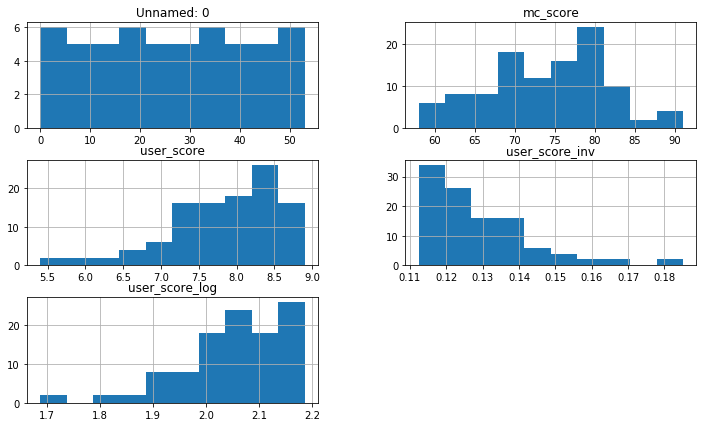

In [170]:
# Histograms
hist = reviews.hist(figsize=(12,7))

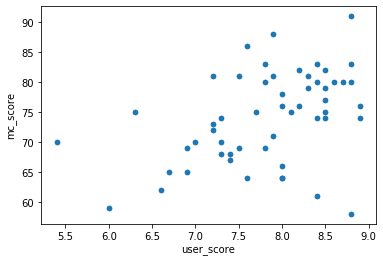

In [172]:
# Scatter diagrams
scatter = reviews.plot(kind="scatter", x="user_score", y="mc_score")

### Statistical analysis

In [173]:
# Simple correlations
reviews.corr()

,Unnamed: 0,mc_score,user_score,user_score_inv,user_score_log
Unnamed: 0,1.000000,0.036952,-0.062906,0.041418,-0.052027
mc_score,0.036952,1.000000,0.423161,-0.414091,0.420565
user_score,-0.062906,0.423161,1.000000,-0.987992,0.997174
user_score_inv,0.041418,-0.414091,-0.987992,1.000000,-0.996795
user_score_log,-0.052027,0.420565,0.997174,-0.996795,1.000000


## Support for multiple pages
SOURCE: https://github.com/qut-dmrc/web-scraping-intro-workshop/blob/eed5d2a9dcc328dc2988b31ac0b8adadc2f0561c/web-scraping-intro-final.ipynb

This notebook scrapes http://www.metacritic.com/browse/albums/artist and saves the data in a dataframe. The script iterates through the webpage structure (structured by the first letter of the artist's name), and over multiple pages within each letter.

### Import packages

In [174]:
import bs4
import requests
import pandas as pd
from os.path import isfile

### Initialise global variables

In [186]:
# This is the base_url
base_url = "http://www.metacritic.com/browse/albums/artist"

In [187]:
# The bot pretends to be a Chrome browser
hdrs = {"User-Agent": "Chrome/78.0"}

In [188]:
# Columns labels
colnames = ["artistname", "albumname", "release_date", "mc_score", "user_score", "url"]

In [189]:
# The pages are sorted in alphabetical order based on the artist's name.
# Artists with strange first letters are put in a page without a letter (the first one)

letters = ["","/a","/b","/c","/d","/e","/f","/g","/h","/i","/j","/k","/l","/m",
           "/n","/o","/p","/q","/r","/s","/t","/u","/v","/w","/x","/y","/z"]

# if you want to limit the number of pages to scrape, you simply shorten this list - e.g.
letters = ["/a","/b"]

### Function definitions

Add a new function to find the number of pages of reviews available for the current letter

In [198]:
# Processes a beautiful_soup data structure and returns a the page count
def get_page_count(thesoup):
    # try to find all div tags of class "pages"
    page_divs = soup.find_all("div",class_=["pages"])
    page_count = 1
    
    # if there is a div of class "pages", then
    if len(page_divs)>0:
        
        # try to find all a-tags
        a_tags = page_divs[0].find_all("a")
        
        # if there were a-tag(s) to be found, then pick the last one in order to get the max page number
        if len(a_tags)>0:
            page_count = int(a_tags[-1].get_text())

    return page_count

The function **get_itemlist** is unchanged from the previous section



### The script

In [191]:
# Prepare the dataframe

# If there is already a file ....
if isfile("reviews.pkl"):    
    # Load reviews from that file
    reviews = pd.read_pickle("reviews.pkl")

else:
    # otherwise, set up an empty dataframe
    reviews = pd.DataFrame(columns=colnames)
# show the number of reviews in the dataframe

print(len(reviews))

108


In [ ]:
# Iterate over the list of letters
for lett in letters:
    
    # Initialise page_count and counter for this letter
    page_count= 1
    i=0
    
    while i < page_count:
    
        # 1. Build up the url
        thepage = base_url+lett+"?page="+str(i)

        # 2. Call the url 
        response_url = requests.get(thepage, headers=hdrs)

        # 3. Transform to soup using html.parser 
        soup = bs4.BeautifulSoup(response_url.text, "html.parser")

        # 4. Extract the new reviews from this page
        new_reviews = get_itemlist(soup)

        # 5. Add the new reviews to the dataframe
        reviews = reviews.append(new_reviews, sort=False)

        # 6. Print something to show how the process develops
        print("URL:",thepage,flush=True)

        # If this is the first page for this letter, then extract the page count
        if i == 0:
            page_count=get_page_count(soup)

        # Increase the counter
        i += 1

    # *** Tidy up the data and save to disk after each letter has been scraped ***
    # Make sure the review scores are numerical (float) types
    reviews["mc_score"] = reviews["mc_score"].map(float)            
    reviews["user_score"] = reviews["user_score"].map(float)        

    # Remove duplicates in case the same page has been scraped more than once
    reviews = reviews.drop_duplicates()
    
    # Save the reviews to a csv file
    reviews.to_csv("reviews.csv")
    
    # Save the reviews to a pkl file
    reviews.to_pickle("reviews.pkl")

URL: http://www.metacritic.com/browse/albums/artist/a?page=0
URL: http://www.metacritic.com/browse/albums/artist/a?page=1
URL: http://www.metacritic.com/browse/albums/artist/a?page=2
URL: http://www.metacritic.com/browse/albums/artist/a?page=3
URL: http://www.metacritic.com/browse/albums/artist/a?page=4
URL: http://www.metacritic.com/browse/albums/artist/a?page=5
URL: http://www.metacritic.com/browse/albums/artist/a?page=6
URL: http://www.metacritic.com/browse/albums/artist/a?page=7
URL: http://www.metacritic.com/browse/albums/artist/a?page=8
URL: http://www.metacritic.com/browse/albums/artist/a?page=9
URL: http://www.metacritic.com/browse/albums/artist/a?page=10
URL: http://www.metacritic.com/browse/albums/artist/b?page=0
URL: http://www.metacritic.com/browse/albums/artist/b?page=1
URL: http://www.metacritic.com/browse/albums/artist/b?page=2
URL: http://www.metacritic.com/browse/albums/artist/b?page=3
URL: http://www.metacritic.com/browse/albums/artist/b?page=4
URL: http://www.metacri

### Check the result

In [ ]:
# How many reviews are there in the dataframe?
len(reviews)

In [ ]:
# Have a look at the first five items
reviews[:5]

### Data processing

In [ ]:
reviews["user_score_inv"] = reviews["user_score"].map(lambda x:1/x)

In [ ]:
reviews["user_score_log"] = reviews["user_score"].map(log)

### Plot the data

In [ ]:
# Histograms
hist = reviews.hist(figsize = (12,7))

In [ ]:
# Scatter diagram
scatter = reviews.plot(kind="scatter",x="user_score",y="mc_score")

### Statistical analysis

In [ ]:
# Simple correlations
reviews.corr()